TimeSeries Data Analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [ ]:
# https://pythondata.com/stationary-data-tests-for-time-series-forecasting/

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


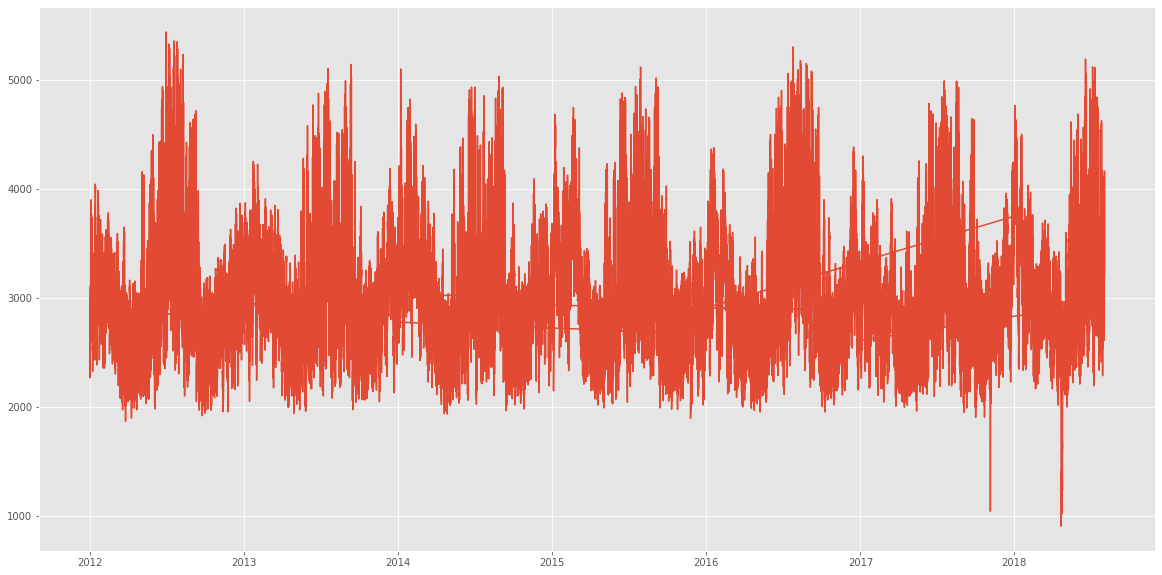

In [ ]:
# add time series
data = pd.read_csv('/content/drive/MyDrive/Spring2023/CMPE-274 (Chandra-Vippulpati - Business Intelligence Technologies)/HW/TimeSeries_InClassDemoFiles /DEOK_hourly.csv')
data['Datetime']=pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)
plt.plot(data)
plt.show()

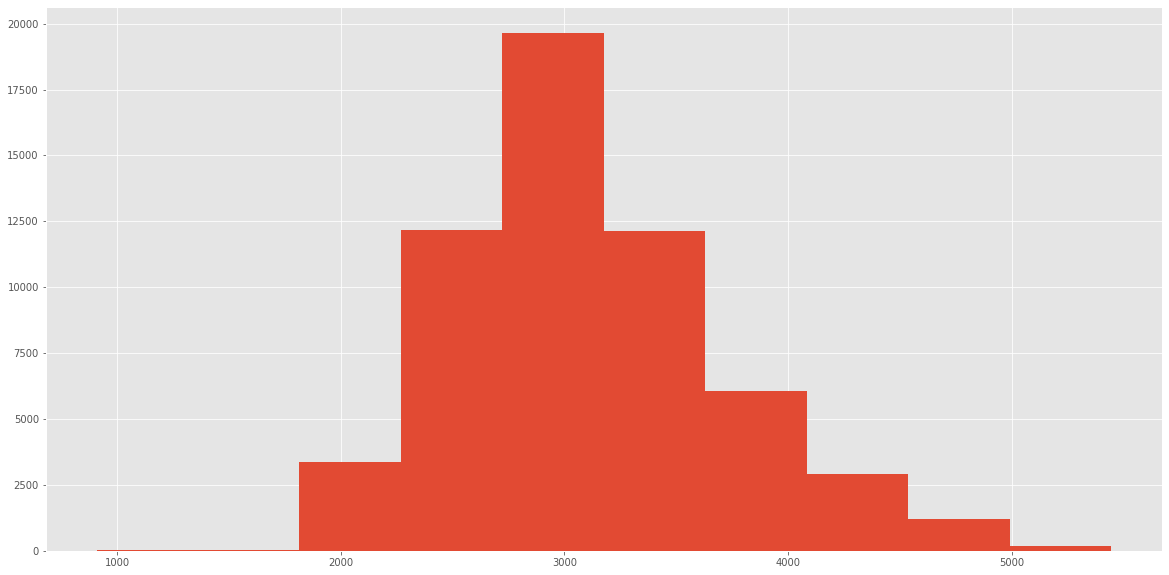

In [ ]:


# add histogram 

data['DEOK_MW'].hist()
plt.show()

In [ ]:
# Split data

one, two, three = np.split(
        data['DEOK_MW'].sample(
        frac=1), [int(.25*len(data['DEOK_MW'])),
        int(.75*len(data['DEOK_MW']))])
                  
                  
mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print(mean1, mean2, mean3)
print(var1, var2, var3)


3107.6946099487322 3102.818496709387 3107.054520263249
368106.09310889314 354347.3612845182 362552.43550592713


(-14.91326780106983, 1.4477674072053477e-27, 57, 57681, {'1%': -3.4304633751328555, '5%': -2.86159010962736, '10%': -2.5667966716717614}, 669611.2391196273)
ADF = -14.91326780106983
p-valx`ue = 1.4477674072053477e-27


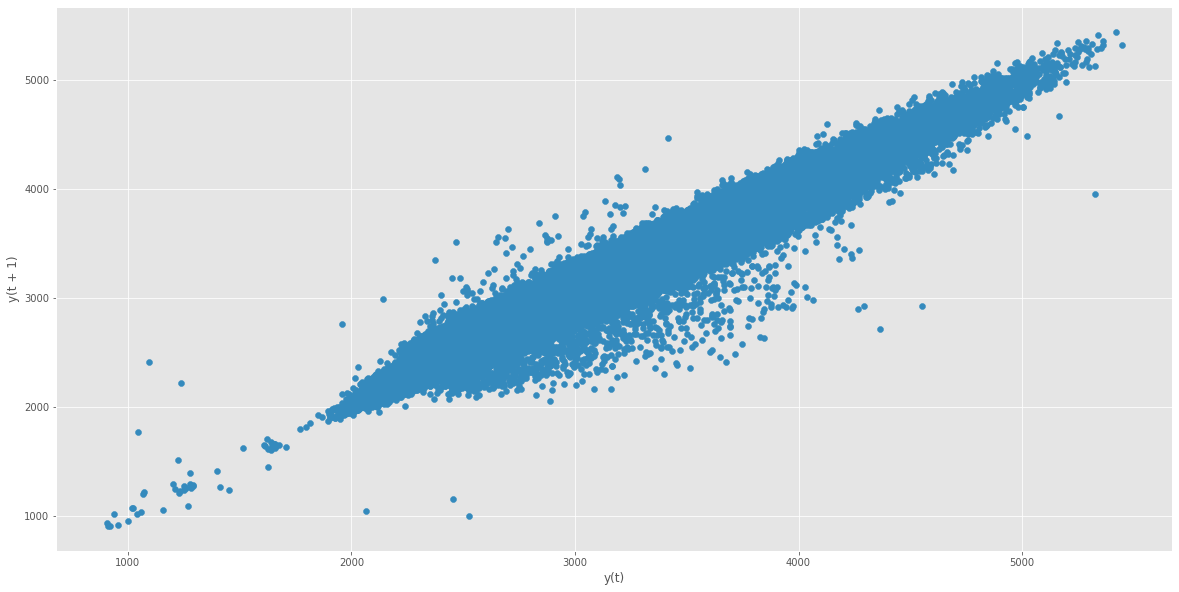

In [ ]:
# Dickey-Fuller Test for Stationarity

from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['DEOK_MW'])

print(adf_test)
print ("ADF = " + str(adf_test[0]))
print ("p-valx`ue = " +str(adf_test[1]))

pd.plotting.lag_plot(data['DEOK_MW'])
plt.show()


In [ ]:

# Forecasting Time Series Data using Autoregression

#create train/test datasets
X = data['DEOK_MW'].dropna()

train_data = X[1:len(X)-12]
test_data = X[len(X)-12:]

print("Train Data length = ")
print(len(train_data))

print("Test Data length = ")
print(len(test_data)) 


Train Data length = 
57726
Test Data length = 
12


In [ ]:

# AR Model

from statsmodels.tsa.ar_model import AR,AutoReg


from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
#train the autoregression model

model = AutoReg(train_data ,lags = [1, 11, 12])
model_fitted = model.fit()

print('The lag value chose is: %s' % model_fitted.k_ar)

print('Coefficients: %s' % model_fitted.params)

# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AttributeError: ignored

In [ ]:
# create a comparison dataframe
compare_df = pd.concat(
    [data['DEOK_MW'].reset_index().tail(12),
    predictions], axis=1).rename(
    columns={'DEOK_MW': 'actual', 0:'predicted'})
compare_df=compare_df[['actual', 'predicted']].dropna()

plt.plot(compare_df)
plt.show()

r2 = r2_score(compare_df.actual, compare_df.predicted)

print('2 score = ')
print(r2)


In [ ]:
print(compare_df.predicted[:12],compare_df.actual[:12])

rmse = sqrt(mean_squared_error(test_data[:12], predictions[:12]))
print('Test RMSE: %.3f' % rmse)
print("Success")